In [120]:
#Data: https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz   with 1586630  rows and , 13  columns 
#first question for this data set is Which brewery produces the strongest beers by ABV%?

#'import tarfile' to get the capability to open compressed / gzipped tarfiles,
import tarfile 
import pandas as pd
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
df = pd.read_csv('beer_reviews (1).tar.gz', compression='gzip')#, header=0, sep=',', quotechar='"')
df.shape

# First ran some initial analysis to undrestand data a bit better, to get the data with the best abv, i found the max abv from data frame
#and and got the subset of data frame using that condition.

# df.head(2)
# df.columns
# df['beer_style'].value_counts()
# %matplotlib inline
# sns.set()
# sns.countplot(x='beer_abv', data=df)
#df.groupby(['beer_abv']).review_taste.sum()
#df.head(2) 
min(df['beer_abv'])
max(df['beer_abv'])
df['beer_reviews/']
df['review_time']
max(df['review_appearance'])
#max(df['review_overall'])
#df['beer_reviews/'].replace(to_replace=['\tbrewery_id float8'],value= 0 ,inplace=True)
#df['beer_reviews/'].replace(to_replace=['NaN'],value= 0 ,inplace=True)
import numpy as np
df['brewery_name'][df['beer_abv'] > 57]

C:\Users\Atena\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1586630, 13)

In [117]:
# the answer for the forst question would be  Schorschbräu
# 12919    Schorschbräu
# Name: brewery_name, dtype: object

# followin are some analysis around mean to know how can we reduce the data.

In [122]:
abv_df = df.groupby(('brewery_name', 'beer_name')).agg({'beer_abv': [np.size, np.mean]})
abv_df.head(13)

beer_abv      
                                                       size  mean
brewery_name          beer_name                                  
't Hofbrouwerijke     Blondelle                         1.0   8.0
                      Bosprotter                        9.0   8.5
                      Hof Korvatunturi                  2.0  11.0
                      Hofblues                         16.0   5.5
                      Hofdraak                          7.0   6.5
                      Hofnar                            1.0   5.0
                      Hoftrol                           1.0   6.2
(512) Brewing Company (512) Alt                        11.0   6.0
                      (512) Black IPA                  13.0   7.0
                      (512) Brandy Barrel Aged ONE      8.0   8.0
                      (512) Bruin                      16.0   7.6
                      (512) Cascabel Cream Stout        7.0   6.0
                      (512) IPA                        54.0   7.0

In [130]:
abv_df.columns

MultiIndex(levels=[['beer_abv'], ['size', 'mean']],
           labels=[[0, 0], [0, 1]])

In [149]:
# Calculating the overall ABV mean for each brewery-- (group by level)
meanabv_df = abv_df.groupby(level='brewery_name').mean()
meanabv_df.head(13)


beer_abv          
                                     size      mean
brewery_name                                       
't Hofbrouwerijke                5.285714  7.242857
(512) Brewing Company           21.714286  7.238462
10 Barrel Brewing Co.            4.941176  6.109091
1516 Brewing Company             1.888889  5.650000
16 Mile Brewing Company         15.333333  5.716667
1648 Brewing Company Ltd         1.000000  3.700000
1702 / The Address Brewing Co.   1.000000  6.800000
192 Brewing Company              1.000000  6.000000
1st City Brewery and Grill       1.500000       NaN
2 Brothers Brewery               5.666667  6.266667
21st Amendment Brewery          35.879518  6.901282
23rd Street Brewery              2.150000  6.805000
2nd Shift Brewery                2.444444  6.680000

In [150]:
meanabv_df.columns

MultiIndex(levels=[['beer_abv'], ['size', 'mean']],
           labels=[[0, 0], [0, 1]])

In [151]:
#plotting will be easier without multiindeexing so i changed columns name 
meanabv_df.columns = ('mean_Ratings', 'mean_abv')
meanabv_df.columns
# resetindex_df = meanABV_df.reset_index()
# resetindex_df.head(4)

Index(['mean_Ratings', 'mean_abv'], dtype='object')

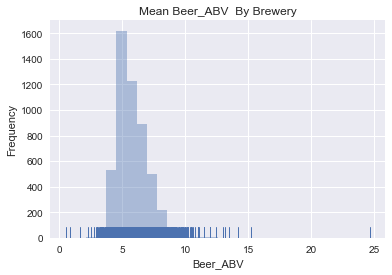

In [154]:
# Seaborn plotting
x = meanabv_df['mean_abv'].dropna()
figdist = sns.distplot(x, bins=30, kde=False, rug=True);

# Matplotlib graph formatting
plt.title('Mean Beer_ABV  By Brewery')
plt.xlabel('Beer_ABV')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Question 2 
#If you had to pick 3 beers to recommend using only the data in this dataset, which would you pick?
# again i addedsome condition on dataframe and got a subset of data, then ran a health check to see  if there is any review for answers.
#the initial answer was 
#BuckeyeNation
#Frank Double IPA	
#Stone Imperial Russian Stout
#Pliny The Younger
# but since no review was exist for this one, the final anwer would be 
#Frank Double IPA	
#Stone Imperial Russian Stout
#Pliny The Younger
df.groupby(['brewery_name']).beer_abv.max()
df.groupby('brewery_name').beer_abv.describe()
df_condition=df['beer_name'] [(df['review_overall'] ==5) & (df['review_appearance']==5) & (df['review_taste']==5) &(df['review_aroma']==5) &(df['review_palate']==5)]
df['review_profilename'].value_counts()
df['review_profilename']=='northyorksammy'
#df_condition.head(2)
df[df['review_profilename']=='BuckeyeNation'] [(df['review_overall'] ==5) & (df['review_appearance']==5) & (df['review_taste']==5) &(df['review_aroma']==5) &(df['review_palate']==5)]


C:\Users\Atena\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,beer_reviews/,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
135281,5318,Port Brewing Company / Pizza Port,1.125787e+09,5.0,5.0,5.0,BuckeyeNation,American Double / Imperial IPA,5.0,5.0,Frank Double IPA,8.1,5933.0
880688,147,Stone Brewing Co.,1.133652e+09,5.0,5.0,5.0,BuckeyeNation,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.5,1160.0
1136901,863,Russian River Brewing Company,1.142207e+09,5.0,5.0,5.0,BuckeyeNation,American Double / Imperial IPA,5.0,5.0,Pliny The Younger,11.0,21690.0
1485072,701,Boundary Bay Brewery & Bistro,1.114647e+09,5.0,5.0,5.0,BuckeyeNation,American Double / Imperial IPA,5.0,5.0,Imperial IPA,NaN,21563.0


In [ ]:
#Frank Double IPA	
#Stone Imperial Russian Stout
#Pliny The Younger
#df.isnull().any(axis=0)


In [ ]:
df['beer_abv'].isnull().sum()
df.shape
df.groupby(['brewery_name']).beer_abv.max()
df['brewery_name'].groupby(df['brewery_name']).count()

In [158]:
#3) Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

# to answer this question, ran RandomForest and used the feature_importance function to find out the most important feature,
#then i created a new dataframe, with feature_importance in one column and the features name in another column.
#then sorted the datafareme  to find most important features 
X=df[['review_aroma', 'review_appearance','review_taste', 'beer_abv']]
y=df['review_overall']
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

#y value = overall review
#remaining columns 

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=42)
forest = RandomForestRegressor(n_estimators=60, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)
print(forest.predict([[0, 5, 4.3, 0]]))

print(forest.feature_importances_)

forest.score(X_train,y_train)
forest.score(X_test,y_test)

C:\Users\Atena\Anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


[ 4.28907708]
[ 0.01581512  0.0209234   0.92156047  0.04170101]


0.64631015679595216

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)>

In [51]:
importance_df=pd.DataFrame({'importance' : forest.feature_importances_, 'feat
                            ures_name':X_train.columns.values})

In [71]:
importance_df.sort_values(['importance'], ascending=False)

,features_name,importance
2,review_taste,0.926252
3,beer_abv,0.038665
1,review_appearance,0.020168
0,review_aroma,0.014915


In [70]:
importance_df['importance']

0    0.014915
1    0.020168
2    0.926252
3    0.038665
Name: importance, dtype: float64

In [164]:
# Question 4 
#Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?
# Grouping by beer_style, and aggregating statistical values
beer_style_data=df[df['beer_style']!=0]
appearance_aroma = beer_style_data.groupby('beer_style').agg({'review_aroma': [np.size, np.mean, np.std],'review_appearance': [np.size, np.mean, np.std]})
appearance_aroma.head(3)

# New agg_mean column and sort descending

appearance_aroma['agg_mean'] =  (appearance_aroma['review_appearance', 'mean'] + appearance_aroma['review_aroma', 'mean'])
appearance_aroma.head()
appearance_aroma.sort_values(('agg_mean'), ascending=False)[:5]
#The American Double / Imperial Stout is the recommended beer type, if you like aroma and appearance.

review_aroma                      \
                                         size      mean       std   
beer_style                                                          
American Double / Imperial Stout      50705.0  4.160665  0.570496   
Russian Imperial Stout                54129.0  4.076576  0.542319   
Quadrupel (Quad)                      18086.0  4.132533  0.544143   
American Double / Imperial IPA        85977.0  4.097782  0.568236   
Gueuze                                 6009.0  4.117574  0.560086   

                                 review_appearance                      \
                                              size      mean       std   
beer_style                                                               
American Double / Imperial Stout           50705.0  4.163633  0.515715   
Russian Imperial Stout                     54129.0  4.210072  0.508614   
Quadrupel (Quad)                           18086.0  4.117964  0.514112   
American Double / Imperial IPA             85977.0  4.078916  0.469188   
Gueuze                                      6009.0  4.034864  0.499991   

                                  agg_mean  
                                            
beer_style                                  
American Double / Imperial Stout  8.324297  
Russian Imperial Stout            8.286649  
Quadrupel (Quad)                  8.250498  
American Double / Imperial IPA    8.176698  
Gueuze                            8.152438

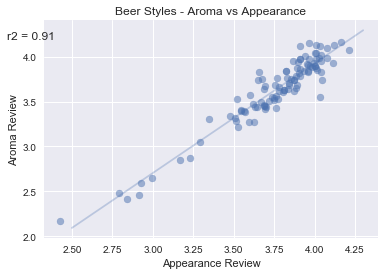

In [165]:


from sklearn.linear_model import LinearRegression
# Scatter plot with linear regression model
X = appearance_aroma['review_appearance', 'mean'].values.reshape(-1, 1)
y = appearance_aroma['review_aroma', 'mean'].values
regressor = LinearRegression()
regressor.fit(X, y)

# Plotting the data
plt.scatter(X, y, alpha=0.5)
plt.title('Beer Styles - Aroma vs Appearance')
plt.xlabel('Appearance Review')
plt.ylabel('Aroma Review')
plt.text(2.1, 4.2, 'r2 = {0:.02f}'.format(regressor.score(X, y)))

# Plotting the regression model
X_fit = np.linspace(2.5, 4.3, 100)[:, np.newaxis]
y_fit = regressor.predict(X_fit)
plt.plot(X_fit.squeeze(), y_fit, alpha=0.3);
plt.show()




